# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [3]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
row =df.shape

In [5]:
print("Number of rows:",row[0])
print("Number of columns:",row[1])

Number of rows: 294478
Number of columns: 5


Finding:- <br>Number of rows: 294478 <br>
Number of columns: 5

**c.** The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

Finding :- 290584 unique users in dataset

**d.** The proportion of users converted.

In [7]:
df_convert = df.query('converted == 1')
df_convert.count()


user_id         35237
timestamp       35237
group           35237
landing_page    35237
converted       35237
dtype: int64

In [8]:
(df_convert.count()['user_id'])/len(df.user_id)

0.11965919355605512

Finding :- 11.96 % of users are converted

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [9]:
df.query('group =="treatment" & landing_page!="new_page"  ').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

Finding:- 1965 is the number of times when the "group" is treatment but "landing_page" is not a new_page.

**f.** Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Finding:- No missing values observed

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query('(group =="control"  & landing_page== "old_page") or (group =="treatment"  & landing_page== "new_page")')
df2.shape

(290585, 5)

In [12]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [13]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.user_id.duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Finding:- UserId 773192 is repeated twice in df2.

**c.** Display the rows for the duplicate **user_id**? 

In [17]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [18]:
# Remove one of the rows with a duplicate user_id..

# Check again if the row with a duplicate user_id is deleted or not
df2.drop(1899,inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
df2.count()

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
dtype: int64

In [21]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>





In [22]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [23]:
df2.converted.mean()

0.11959708724499628

Finding:- 11.959% of individuals converting regardless of the page they receive. Probability = 0.11959

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
control =df2.query('group=="control"')
control['converted'].mean()

0.1203863045004612

Finding:- 0.12038 is the probability of an individual who was in the control group, & is converted

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
treatment =df2.query('group=="treatment"')
treatment['converted'].mean()

0.11880806551510564

Finding:- 0.1188 is the probability of an individual who was in the treatment group & is converted

In [64]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff =control['converted'].mean()-treatment['converted'].mean() #Conversion rate of control - treatment
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [27]:
temp_new_page = df2.query('landing_page=="new_page"')
len(temp_new_page)/len(df2)

0.5000619442226688

In [28]:
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [29]:
df2.group.value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

Finding:-Probability that an individual received the new page = 0.5

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**
Treatment group count is 145310 whereas control group count is 145274. But still control group conversion rates are slightly better than the treatment group conversion.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Put your answer here.**
<br>
**$H_0$**=**$p_{new}$** -**$p_{old}$** <=0  <br> **$H_1$** =**$p_{new}$** -**$p_{old}$** >0 

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [30]:
p_new = df2['converted'].mean()
control_df = df2.query('group=="control"')
treatment_df = df2.query('group=="treatment"')
convRateOld = control_df['converted'].mean()
convRateNew = treatment_df['converted'].mean()

In [31]:
p_new , convRateOld, convRateNew

(0.11959708724499628, 0.1203863045004612, 0.11880806551510564)

In [32]:
control_df = df2.query('group=="control"')
treatment_df = df2.query('group=="treatment"')

control_df_sample = control_df.sample(25000)
treatment_df_sample = control_df.sample(25000)


control_df_sample_mean = control_df_sample.converted.mean()
treatment_df_sample_mean = control_df_sample.converted.mean()

In [33]:
control_df_sample_mean, treatment_df_sample_mean

(0.12, 0.12)

In [34]:
diffs = []

df22 = df2[['group','converted']]
size = df22.shape[0]

for _ in range(10000):
    b_samp = df22.sample(60000, replace=True)
    control_df = b_samp.query('group == "control"')
    treatment_df = b_samp.query('group == "treatment"')
    control_ctr = control_df.converted.mean()
    treatment_ctr = treatment_df.converted.mean()
    diffs.append(treatment_ctr - control_ctr) 

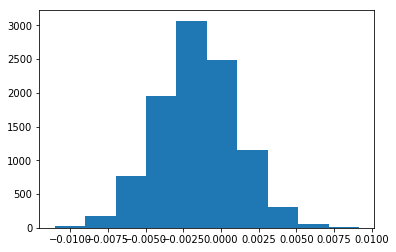

In [35]:
plt.hist(diffs)
plt.show()

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [42]:
p_old = df2['converted'].mean()


In [43]:
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [44]:
df2.group.value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [45]:
n_new=145310
n_old =145274

Finding:- n_new = 145310

**d.** What is $n_{old}$, the number of individuals in the control group?

Finding:- n_old = 145274

In [40]:
p_new- p_old

0.0

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [49]:
new_page_converted = np.random.choice([0,1],size = (n_new, 1), p=(p_new,1-p_new))
new_page_converted

array([[1],
       [1],
       [1],
       ..., 
       [1],
       [1],
       [0]])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [50]:
old_page_converted = np.random.choice([0,1],n_new, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [53]:
obs_diff = new_page_converted.mean()-old_page_converted.mean()
obs_diff
print('The output for p_new - p_old is {},  the value is really 0.'.format(obs_diff))

The output for p_new - p_old is 0.00097722111348153,  the value is really 0.



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [48]:
# Sampling distribution 
p_diffs=[]
for _ in range(10000):
    new_page_converted  = np.random.choice([0,1], n_new, p=[1-p_new,p_new]).mean()
    old_page_converted  = np.random.choice([0,1], n_old, p=[1-p_old,p_old]).mean()
    p_diffs.append(new_page_converted-old_page_converted)

In [39]:
p_diffs #p_diffs consist of  "converted" probability  (𝑝′𝑛𝑒𝑤  -  𝑝′𝑜𝑙𝑑)  for your simulated samples

[-0.0084747288983052643,
 -0.0059894695348280541,
 -0.0016043294040568867,
 -0.0010542052628475101,
 -0.00052861165002310306,
 -0.0031569234298411963,
 -0.0033130476155134037,
 0.0013882723204505509,
 -0.0012368574390035914,
 -0.0055734417575123013,
 -0.0029417597408600143,
 -0.00017862253977340981,
 0.0028343749837773657,
 -0.0016733160315210022,
 -0.0021058774608531533,
 -0.0018004826705834559,
 -0.0045395369091009025,
 -0.0028080355586755923,
 0.0018776505245311215,
 0.00074435349543698626,
 -0.0051392152834928428,
 -0.0017963284923015188,
 -0.0020728508855169525,
 -0.0029606527968508989,
 -0.0032380699047365735,
 -0.0018792784548090219,
 -0.0016306231960214745,
 0.00082736792562534966,
 -0.0036651886172656828,
 -0.0045777798123465829,
 -0.0032321874412287177,
 -0.0023401342487016363,
 -0.0034422688697187398,
 -0.00074428833861837906,
 0.003889265472163006,
 -0.00096940320986904638,
 -0.005374647783749617,
 -0.0010223425344161458,
 -0.0042353024711137832,
 -0.00077738472995420027,
 

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



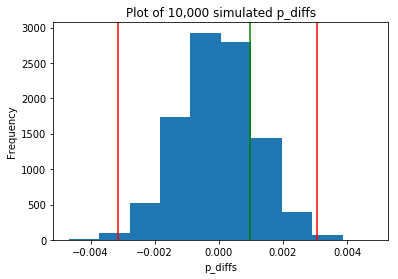

In [59]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10,000 simulated p_diffs')
lower, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)
plt.axvline(x=lower, color= 'r')
plt.axvline(x=upper, color='r')
plt.axvline(obs_diff, color='green');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [55]:
#Calculated the number of users with all new_page users and all old_page users who had a converted status

convertNew = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

convertOld = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [57]:
# Actual converted rate

convert_new_actual = float(convertNew)/ float(n_new) 
convert_old_actual = float(convertOld)/ float(n_old)

In [58]:
print('The proportion of new_page users who converted was {}.'.format(convert_new_actual))
print('The proportion of old_page users who converted was {}.'.format(convert_old_actual))

The proportion of new_page users who converted was 0.11880806551510564.
The proportion of old_page users who converted was 0.1203863045004612.


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? 

>**Answer:**<br>
We are calculating in part j. are p-values. A p-value is the probability of observing our statistic: whether or not the null hypothesis is true. In our case, the p-value is the probability of p_new being less than or equal to p_old. The value that we are observing above lets us know that there is no real advantage to converting to the new page. Thus, we are able to conclude that ths null hypothesis i true: as the old and new pages perform in such a way that there appears to be no statistically significant difference between the conversion rates of the old and new landing pages.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [60]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = sum(df2.query("group == 'control'")['converted'])

# number of conversions with the new_page
convert_new = sum(df2.query("group == 'treatment'")['converted'])

# number of individuals who were shown the old_page
n_old = len(df2.query("group == 'control'"))
# number of individuals who received new_page
n_new = len(df2.query("group == 'treatment'"))


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 


The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 



In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---



In [62]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



In [63]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.905058312759
1.64485362695


>**Answer**
This model returned a z-score of 1.31092, which is less than the critical value of 1.64485. Thus, we are unable to reject the null hypothesis. Again, there is no discernible statistical difference in the performance of the old landing page and the new landing page. The observation in this section is in agreement with the findings from both parts j and k.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

We should be performing a logistic regression in this case, since conversion is binary in nature and will likely lead to a logarithmic function (Sigmoid function)

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [66]:
df2['intercepts']=1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercepts,control,treatment,old_page,new_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [72]:
reg = sm.Logit(df2['converted'],df2[['intercepts','ab_page']]) ## logistic regression model using intercept and ab_page column


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [73]:
result = reg.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-30 16:41 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercepts   -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [74]:
1/np.exp(-0.0150) 

1.0151130646157189

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


The ab_page p-value is 0.1899. It is larger than our Type 1 error rate of .05, which tells us that the landing page is not statistically significant in predicting whether the viewer converts or not.The big difference is, this is a two-tailed test and in Part II was one tailed test.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 Age group limitations could influence whether or not an individual converts to new page or not. Sometimes adding too many factors could complicate the model making it hard to interprete properly.Something we can try is a timestamp, to let us know the time and day conversion takes place more. Also knowing about the user destination can give some useful insights.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [75]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [77]:
# Join with the df2 dataframe
df_merged = df2.set_index('user_id').join(countries_df.set_index('user_id'),on = "user_id")

In [78]:
# Create the necessary dummy variables
df_merged[['US','UK','CA']]= pd.get_dummies(df_merged['country'])

In [79]:
df_merged.head()

,timestamp,group,landing_page,converted,intercepts,control,treatment,old_page,new_page,ab_page,country,US,UK,CA
user_id,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,1,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,1,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,0,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,1,1,0,US,0,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 



In [90]:
# Fit your model, and summarize the results
reg1 = sm.Logit(df_merged['converted'],df_merged[['intercepts', 'CA', 'UK']]) ## logistic regression model using intercept and country column


In [91]:
res = reg1.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-30 17:03 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercepts    -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
CA             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

In [92]:
np.exp(res.params)


intercepts    0.130350
CA            1.041647
UK            1.052027
dtype: float64

As we can see all p-values are greater than our Type 1 error rate of 0.05, which tells us country does not have a significant impact on conversion.



**`Regression Findings:`** <br>
By performing this regression it is found that the values did not demonstrate a statistically significant difference in the conversion rates for the control gorup and the treatment group. Thus, we are unable to reject the Null Hypothesis. The best guidance from performing these analyses is that the existing page be kept and not be replaced by the new landing page.

## Summary: 

<br>By performing all of these analyses, we are unable to determine from this A/B Test if the new landing page performs better. In fact, what we were able to determine is that the old page performs slightly better than the old page (at very minimal values) through multiple statistical analysis techniques. As a result of this analysis, we were unable to reject our null hypotheses. Due to the limited amount of data at hand--including not having access to additional information about the individual users and their experiences with the website--we are limited in our conclusions.


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!




<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])